In [1]:
from anastruct import SystemElements
import pandas as pd

In [2]:
def read_csv(filename, section):
    df = pd.read_csv(filename, sep=';')
    return df[df['Profil'] == section]

## Rammekonstruktioner

Her kommer der et eksempel på hvordan rammekonstruktioner med momentstive hjørner ikke altid er 100% intuitive, hvis man kommer fra blot at lave almindelige fritlegemediagrammer.

Udgangspunktet er en simpel ramme, med en linjelast på toppen.

### Stivhed

Dette er ikke en FEM laktion i hvordan eller hvorfor emner opfører sig som de gør, men blot et eksempel. 

I første omgang starter vi med et system uden angivelse af stivhedsparametre.

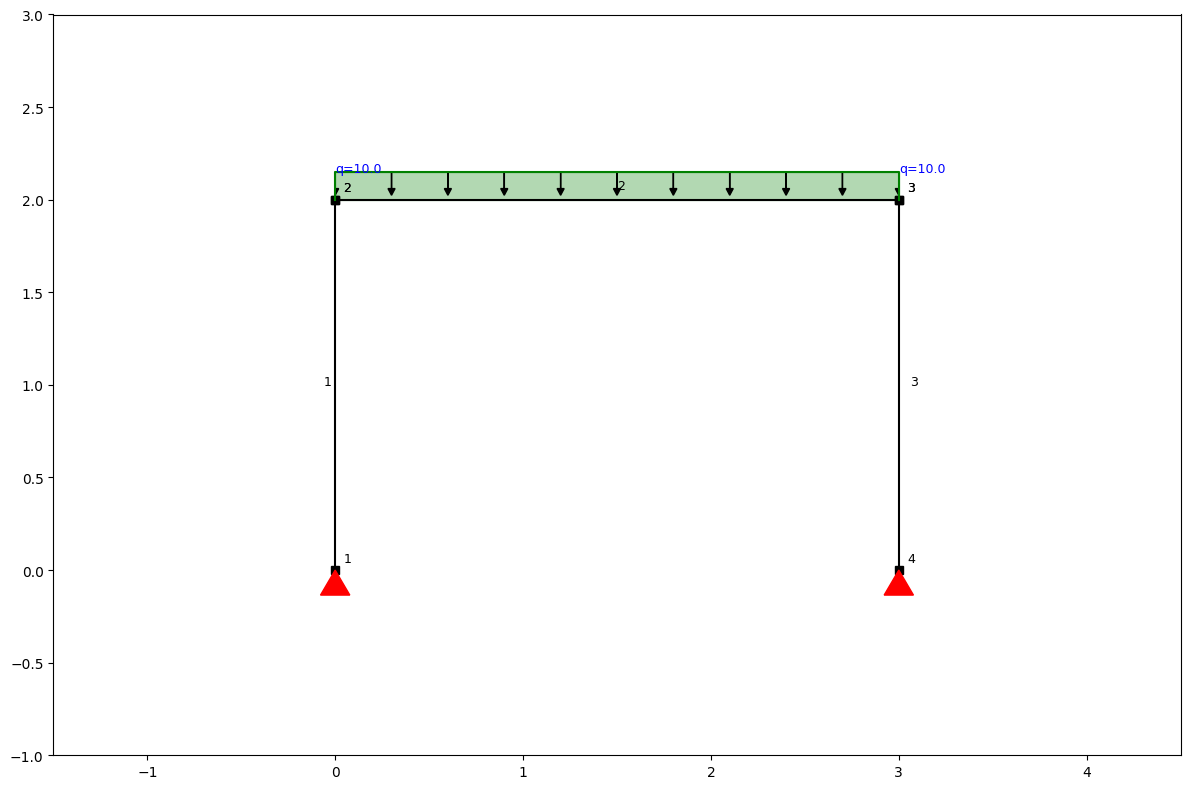

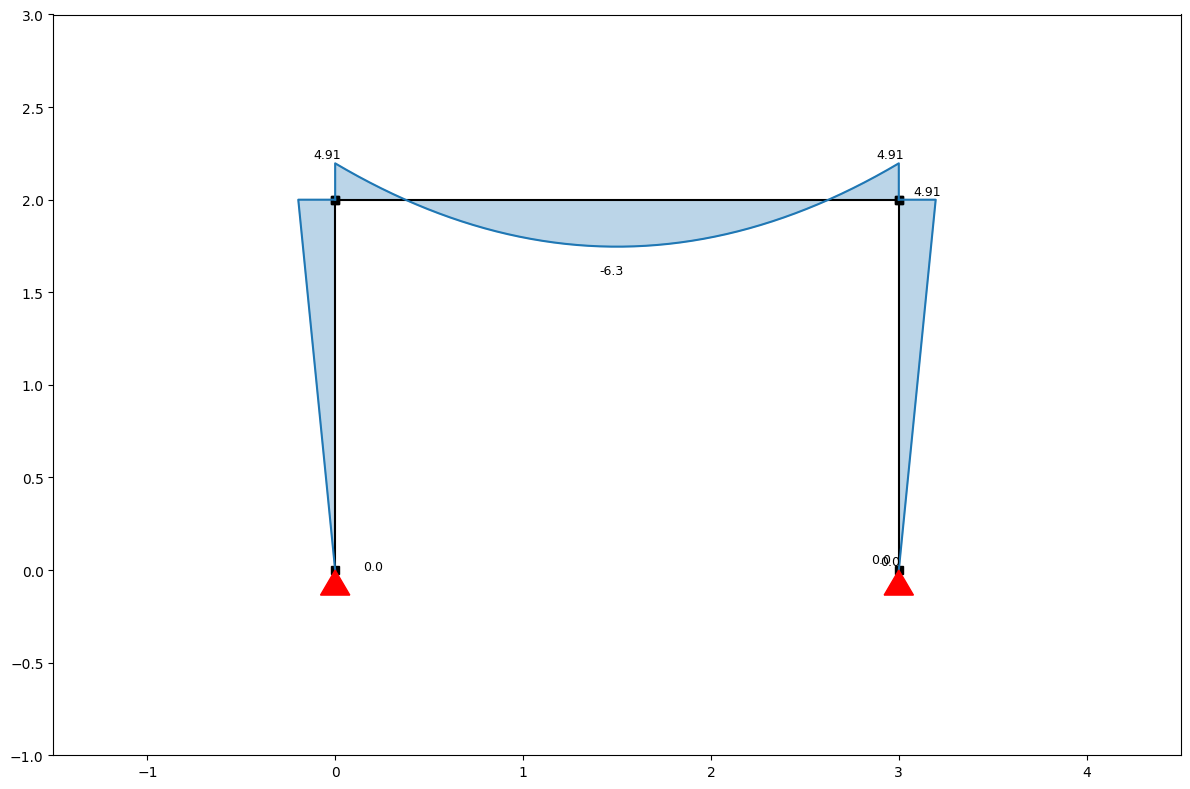

In [3]:
def fld():
    ss = SystemElements()
    ss.add_element(location = [[0, 0], [0, 2]]) # 3m søjleben
    ss.add_element(location = [[0, 2], [3, 2]]) # 3m bjælke
    ss.add_element(location = [[3, 2], [3, 0]]) # 3m søjleben
    
    ss.add_support_hinged(node_id = 1) # Simpel understøtning i venstre side
    ss.add_support_hinged(node_id = 4) # Simpel understøtning i højre side
    
    ss.q_load(element_id=2, q = -10) # 10 kN/m2 lodret last på bjælken
    
    ss.solve()
    
    ss.show_structure()
    ss.show_bending_moment()

fld()
    

Dette output skulle meget gerne ligne et fritlegemediagram som man ville lave det i hånden, hvor man antager at emnerne er udendeligt stive.

Nu prøver vi i stedet et system med en HE300B bjælke og to SHS70x70x5 søjler - emner hvor der er stor forskel på stivheden.

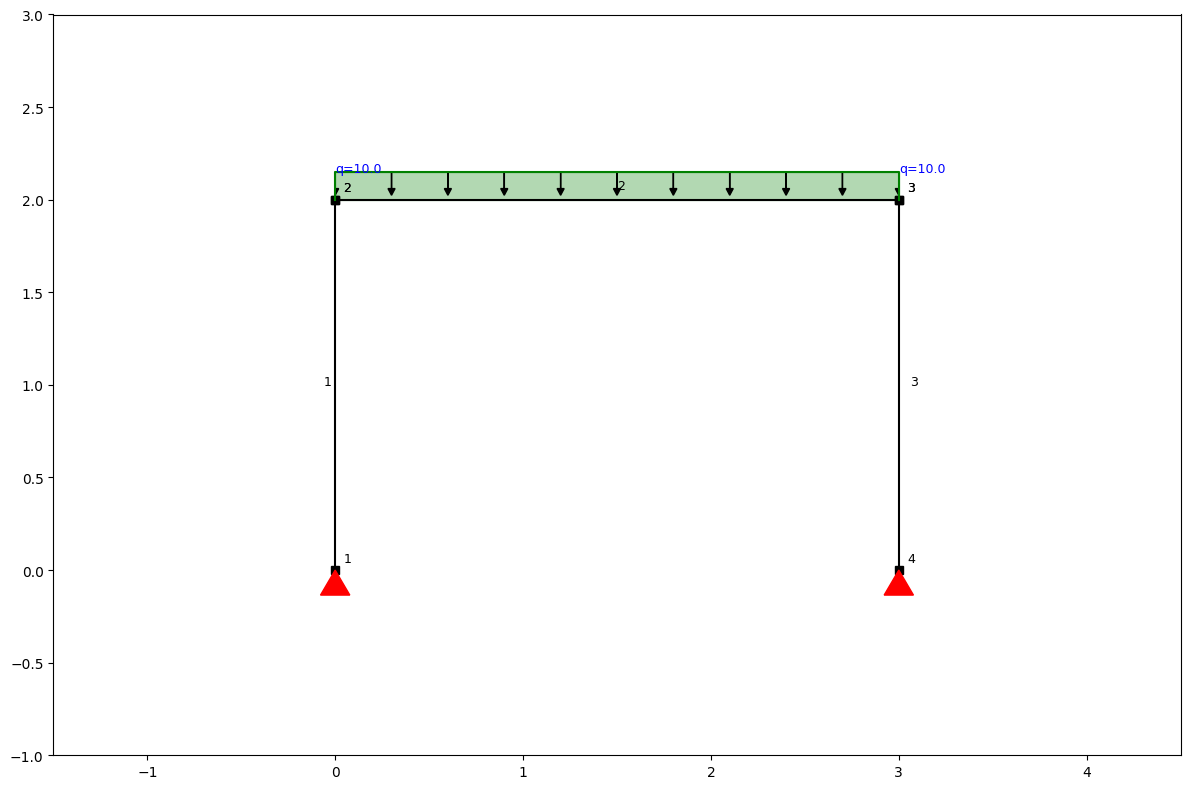

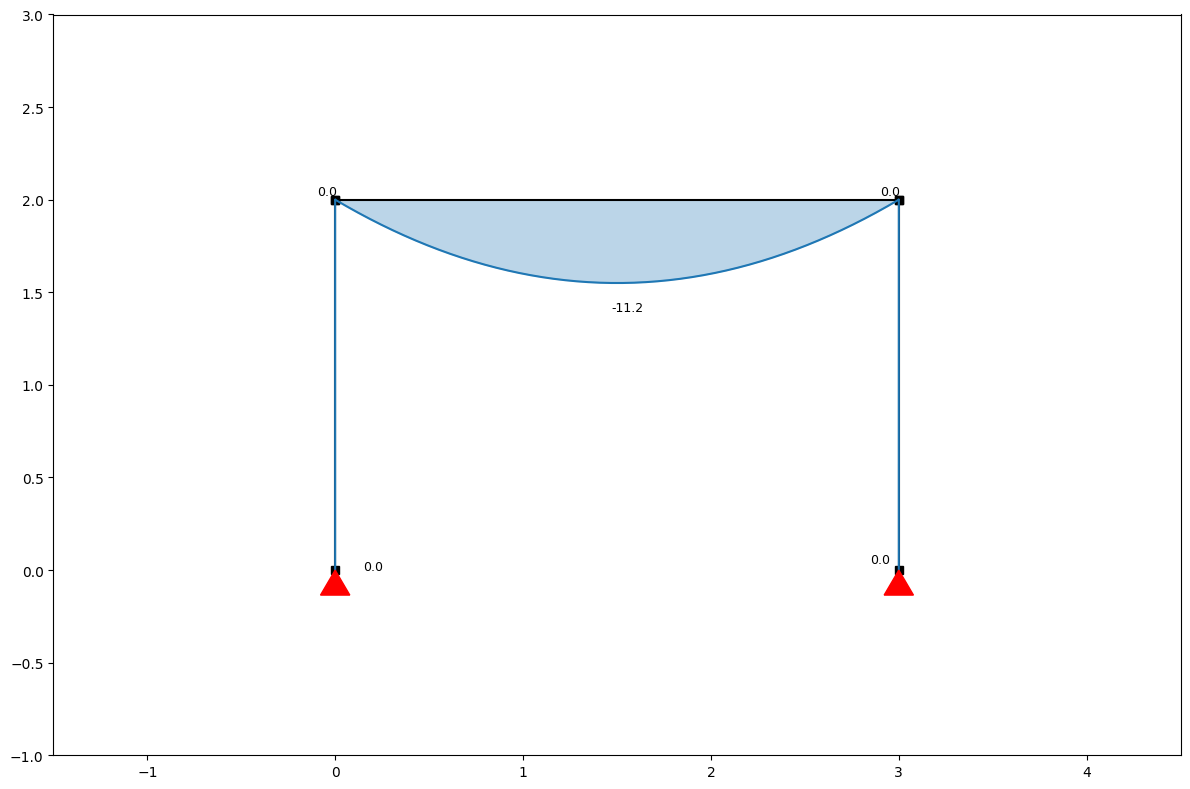

In [4]:
def HEB_SHS():
    ss = SystemElements()
    
    E = 210000
    
    beam = read_csv('BeamData.csv', 'HE300B')
    b_iy = float(beam['Iy'].iloc[0]) # Bjælkens inertimoment
    b_a = float(beam['A'].iloc[0]) # Bjælkens areal
    
    b_EA = b_a * E
    b_EI = b_iy * E
    
    column = read_csv('BeamData.csv', 'SHS70x70x5-V')
    c_iy = float(column['Iy'].iloc[0]) # Søjlens inertimoment
    c_a = float(column['A'].iloc[0]) # Søjlens areal
    
    c_EA = c_a * E
    c_EI = c_iy * E
    
    ss.add_element(location = [[0, 0], [0, 2]], # 2m søjleben
                   EA = c_EA,
                   EI = c_EI,
    )
    ss.add_element(location = [[0, 2], [3, 2]], # 3m bjælke
                   EA = b_EA,
                   EI = b_EI,
    )
    ss.add_element(location = [[3, 2], [3, 0]], # 2m søjleben
                   EA = c_EA,
                   EI = c_EI,
    )
    
    ss.add_support_hinged(node_id = 1) # Simpel understøtning i venstre side
    ss.add_support_hinged(node_id = 4) # Simpel understøtning i højre side
    
    ss.q_load(element_id=2, q = -10) # 10 kN/m2 lodret last på bjælken
    
    ss.solve()
    
    ss.show_structure()
    ss.show_bending_moment()

HEB_SHS()
    

Det er tydeligt at se, at selvom vi ikke har ændret på systemet, overføres krafterne anderledes, netop pga. stivheden.

Hvis vi anvender profiler der minder mere om hinanden i forhold til stivhed, er det tydeligt at konstruktionen begynder at opføre sig mere som vi vil forvente.

Her udelukkende med HE160B

Beam EA: 1140300000.0
Beam EI: 5229000000000.0
Column EA: 2478000000.0
Column EI: 31332000000000.0


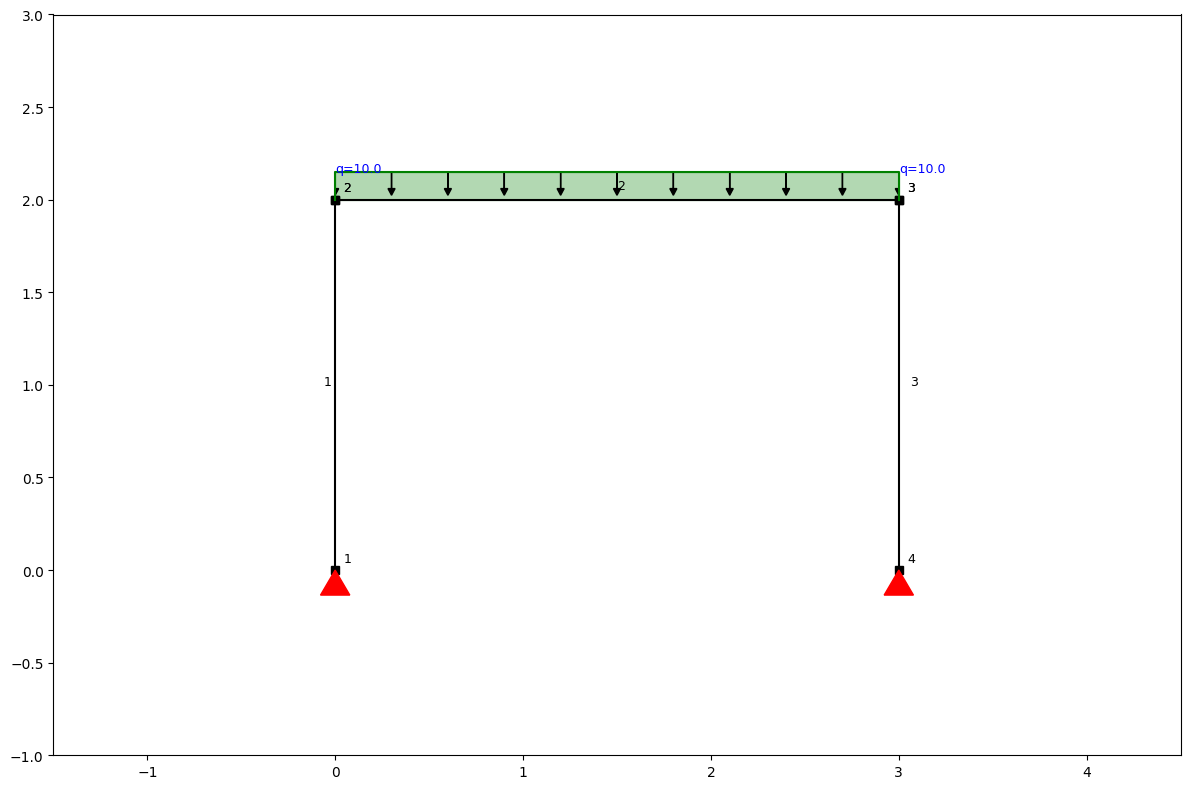

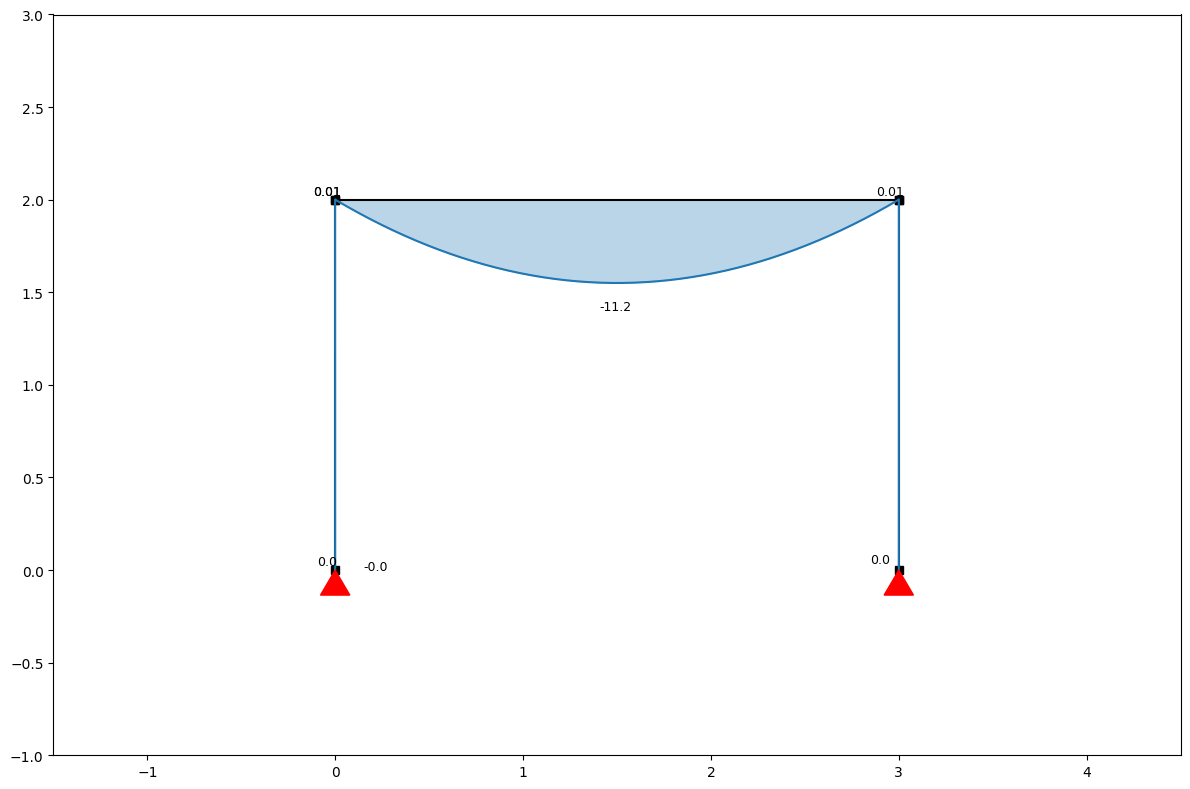

In [ ]:
def HEB_HEB():
    ss = SystemElements()
    
    E = 210000
    
    beam = read_csv('BeamData.csv', 'HE160B')
    b_iy = float(beam['Iy'].iloc[0]) # Bjælkens inertimoment
    b_a = float(beam['A'].iloc[0]) # Bjælkens areal
    
    b_EA = b_a * E
    b_EI = b_iy * E
    
    column = read_csv('BeamData.csv', 'HE300B')
    c_iy = float(column['Iy'].iloc[0]) # Søjlens inertimoment
    c_a = float(column['A'].iloc[0]) # Søjlens areal
    
    c_EA = c_a * E
    c_EI = c_iy * E
    
    ss.add_element(location = [[0, 0], [0, 2]], # 2m søjleben
                   EA = c_EA,
                   EI = c_EI,
    )
    ss.add_element(location = [[0, 2], [3, 2]], # 3m bjælke
                   EA = b_EA,
                   EI = b_EI,
    )
    ss.add_element(location = [[3, 2], [3, 0]], # 2m søjleben
                   EA = c_EA,
                   EI = c_EI,
    )
    
    ss.add_support_hinged(node_id = 1) # Simpel understøtning i venstre side
    ss.add_support_hinged(node_id = 4) # Simpel understøtning i højre side
    
    ss.q_load(element_id=2, q = -10) # 10 kN/m2 lodret last på bjælken
    
    ss.solve()
    
    print(f"Beam EA: {b_EA}")
    print(f"Beam EI: {b_EI}")
    
    print(f"Column EA: {c_EA}")
    print(f"Column EI: {c_EI}")
    
    ss.show_structure()
    ss.show_bending_moment()

HEB_HEB()